## Fundamentals


### Evaluating polynomials

Take-aways

- Efficient ways to compute polynomails
  - Horner's algorithm
- Computational ways of thinking
  - They are often different from mathematics.
  - They are often non-obvious.

#### Horner's algorithm

##### Devising

**Method 1** (Simplest way)

To make the discussion concrete, fix a polynomial

$$
p(x) = 2 x^4+3 x^3-3 x^2+5 x-1
$$

Plug in $1/2$

$$
P\left(\frac{1}{2}\right)=2 * \frac{1}{2} * \frac{1}{2} * \frac{1}{2} * \frac{1}{2}+3 * \frac{1}{2} * \frac{1}{2} * \frac{1}{2}-3 * \frac{1}{2} * \frac{1}{2}+5 * \frac{1}{2}-1=\frac{5}{4}
$$

Complexity: count `*` and `+` (or `-`)

**Method 2** (Recycle previous powers)

$$
\begin{aligned}
\frac{1}{2} * \frac{1}{2} & =\left(\frac{1}{2}\right)^2 \\
\left(\frac{1}{2}\right)^2 * \frac{1}{2} & =\left(\frac{1}{2}\right)^3 \\
\left(\frac{1}{2}\right)^3 * \frac{1}{2} & =\left(\frac{1}{2}\right)^4
\end{aligned}
$$

Take the linear combination:

$$
P\left(\frac{1}{2}\right)=2 *\left(\frac{1}{2}\right)^4+3 *\left(\frac{1}{2}\right)^3-3 *\left(\frac{1}{2}\right)^2+5 * \frac{1}{2}-1=\frac{5}{4} .
$$

**Method 3** (Horner's algorithm - Nested multiplication)

Rewrite 

$$
\begin{aligned}
P(x) & =-1+x\left(5-3 x+3 x^2+2 x^3\right) \\
& =-1+x\left(5+x\left(-3+3 x+2 x^2\right)\right) \\
& =-1+x(5+x(-3+x(3+2 x))) \\
\end{aligned}
$$

Then,

$$
P(\frac{1}{2}) =-1+\frac{1}{2} *(5+\frac{1}{2} *(-3+\frac{1}{2} *(3+\frac{1}{2} * 2)))
$$


|  | multiplication | addition |
|---|---|---|
| Method 1 | 10 | 4 |
| Method 2 | 7 | 4 |
| Method 3 | 4 | 4 |

**Remark** (Efficiency of Horner)

- Horner's algorithm does not transform the coefficients, but use those numbers as they are $\longrightarrow$ less computations are purely a gain.

#### Summary

Horner's algorithm for $p(x) = a_0+a_1 x+\cdots+a_d x^d$ (degree $d$)

- costs $d$ multiplications and $d$ additions
- is based on rewriting: $a_0+x*\left(a_1+x*\left(a_2+\cdots *\left(a_{d-1}+x*\left(a_d\right)\right)\cdots\right)\right)$
- A more general version uses base points $r_1, \cdots, r_d$.
  - $a_0+(x - r_1)*\left(a_1 + (x - r_2)*\left(a_2+\cdots *\left(a_{d-1}+(x - r_{d})*\left(a_d\right)\right)\cdots\right)\right)$
  - This general version is useful in polynomial interpolation.
  - $r_i=0$ ($i=1,2,\cdots,d$) gives us the (plain) Horner form given above.



In [13]:
import numpy as np

def poly_eval(a, x, algorithm='Horner'):
    """
    Evaluates a polynomial at a given point x.

    Inputs:
        a: 1D array of polynomial coefficients (ascending order). 
        x: 1D array of points at which to evaluate the polynomial.
        algorithm: algorithm to use for polynomial evaluation. (default: 'Horner')
    Output:
        p: array of polynomial values at x.
    """

    if algorithm == 'Horner':
        p = a[-1]*np.ones_like(x)
        for i in range(len(a)-2, -1, -1):
            p = x*p + a[i]
    
    return p

[5.62358419e-02 1.34332150e+00 6.91612963e+00 2.07064858e+01
 4.66462157e+01 8.86671448e+01 1.50701099e+02 2.36679903e+02
 3.50535384e+02 4.96199366e+02]


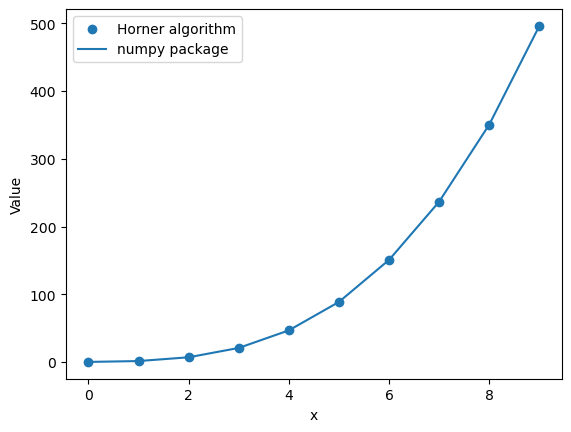

In [28]:
d = 4
# a = np.ones(d, dtype=np.float64)
a = np.random.rand(d)
x = np.arange(10)
p = poly_eval(a, x)

print(p)

# Plot part is generated by Copilot
import matplotlib.pyplot as plt

# Scatter plot of p at x
plt.scatter(x, p, label='Horner algorithm')

# Polynomial plot
poly = np.poly1d(a[::-1])  # Create a polynomial object with coefficients in ascending order
plt.plot(x, poly(x), label='numpy package')

# Set labels and legend
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()




[0 1 2]


**Remark**

- You might think the difference is not a big deal. What would you pursue if your numerical problem may end up evaluating polynomials millions or billions of times?
  - This is indeed true when you solve nonlinear PDE.